<a href="https://colab.research.google.com/github/mariahelenass/AI-MODELS/blob/main/Arquiteturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight

## Arquitetura 1

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train = X_train/255
X_test = X_test/255

In [4]:
X_train = X_train.reshape(-1,28,28,1)
X_train = X_train.reshape(-1,28,28,1)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# aplicando elastic net
regularization = regularizers.l1_l2(l1=0.001, l2=0.001)

In [7]:
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu', kernel_regularizer=regularization),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu', kernel_regularizer=regularization),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32,activation='relu', kernel_regularizer=regularization),
    layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32, callbacks=[early_stop])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.5968 - loss: 1.7372 - val_accuracy: 0.7726 - val_loss: 0.8998
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.7685 - loss: 0.8746 - val_accuracy: 0.7974 - val_loss: 0.7651
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.7948 - loss: 0.7618 - val_accuracy: 0.7724 - val_loss: 0.7923
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8056 - loss: 0.7205 - val_accuracy: 0.8092 - val_loss: 0.7033
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 22ms/step - accuracy: 0.8157 - loss: 0.6826 - val_accuracy: 0.8182 - val_loss: 0.6731
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8173 - loss: 0.6657 - val_accuracy: 0.8080 - val_loss: 0.6680
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8202 - loss: 0.6458 - val_accuracy: 0.8258 - val_loss: 0.6282
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.8238 -

Early stopping para evitar overfitting

## Erro ao longo das épocas

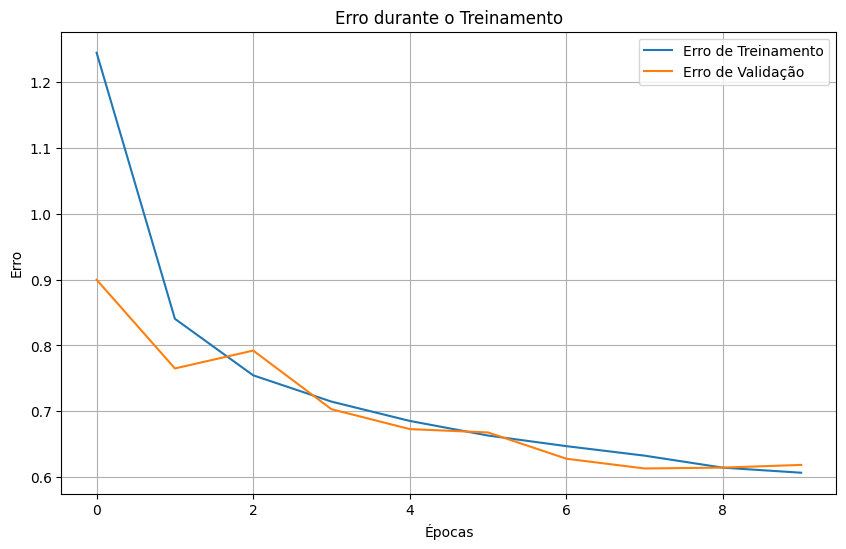

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')

plt.title('Erro durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.show()

## Acurácia ao longo das épocas

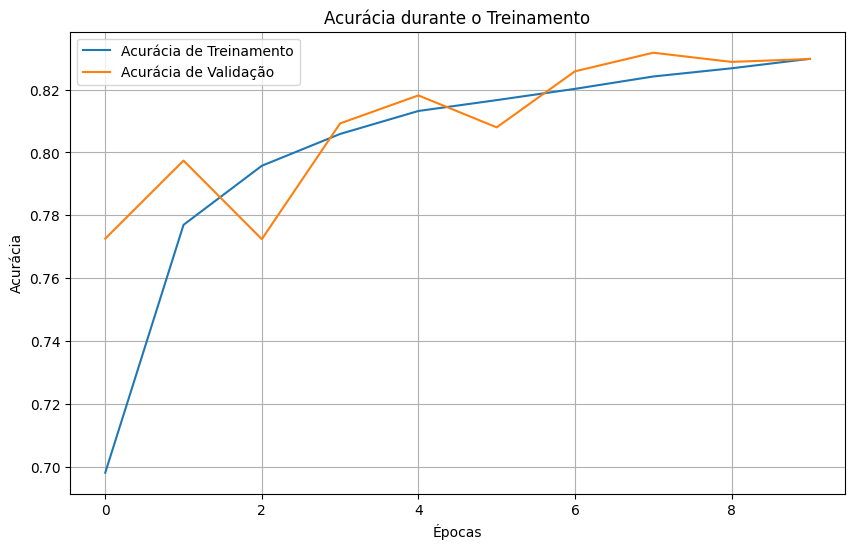

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')

plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

## Métricas

In [13]:
labels = np.argmax(y_test, axis=1)

In [14]:
predict = model.predict(X_test)
preds = np.argmax(predict, axis=1)

report = classification_report(labels, preds)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.69      0.71      0.70      1000
           3       0.78      0.87      0.82      1000
           4       0.67      0.77      0.71      1000
           5       0.94      0.92      0.93      1000
           6       0.62      0.43      0.51      1000
           7       0.88      0.94      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



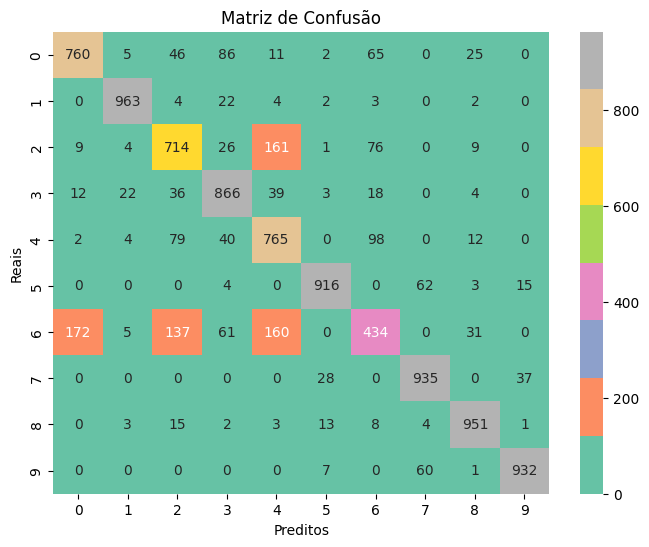

In [15]:
cm = confusion_matrix(labels, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Set2')
plt.title('Matriz de Confusão')
plt.xlabel('Preditos')
plt.ylabel('Reais')
plt.show()

Modelo prevê bem para a maioria das classes com a excessão da classe 6.

## Arquitetura 2

Fazendo ajuste fino nos parâmetros para melhorar desempenho da classe 6

In [8]:
ytrain = np.argmax(y_train, axis=1)

In [9]:
balanced = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(ytrain),
    y=ytrain
)

class_weight = dict(enumerate(balanced))

In [18]:
model2 = models.Sequential([
    layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],

)

In [21]:
history2 = model2.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=64, callbacks=[early_stop])

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.6052 - loss: 1.1245 - val_accuracy: 0.8048 - val_loss: 0.5397
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8092 - loss: 0.5215 - val_accuracy: 0.8297 - val_loss: 0.4773
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8286 - loss: 0.4649 - val_accuracy: 0.8378 - val_loss: 0.4423
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8457 - loss: 0.4250 - val_accuracy: 0.8431 - val_loss: 0.4342
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8550 - loss: 0.3986 - val_accuracy: 0.8474 - val_loss: 0.4217
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8621 - loss: 0.3795 - val_accuracy: 0.8528 - val_loss: 0.4013
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8675 - loss: 0.3582 - val_accuracy: 0.8651 - val_loss: 0.3748
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8769 - loss: 0.3401 - 

## Erro ao longo das épocas

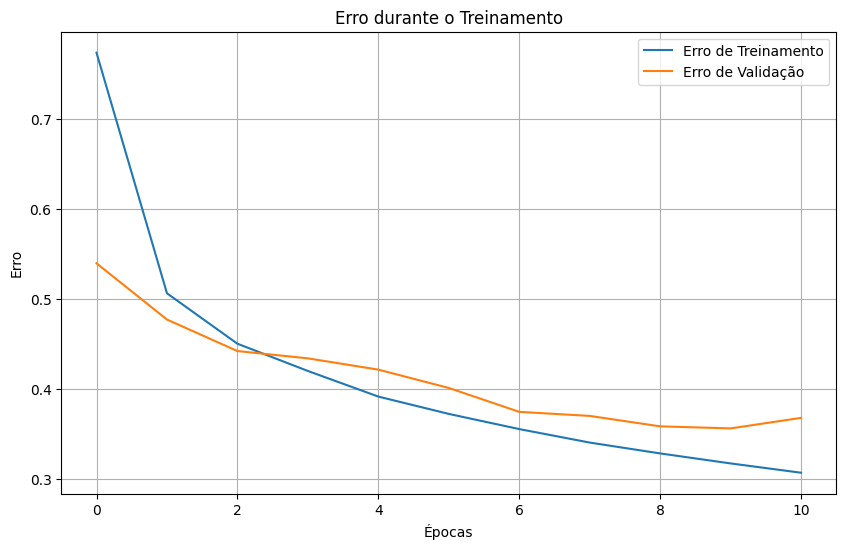

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(history2.history['loss'], label='Erro de Treinamento')
plt.plot(history2.history['val_loss'], label='Erro de Validação')

plt.title('Erro durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.show()

## Acurácia ao longo das épocas

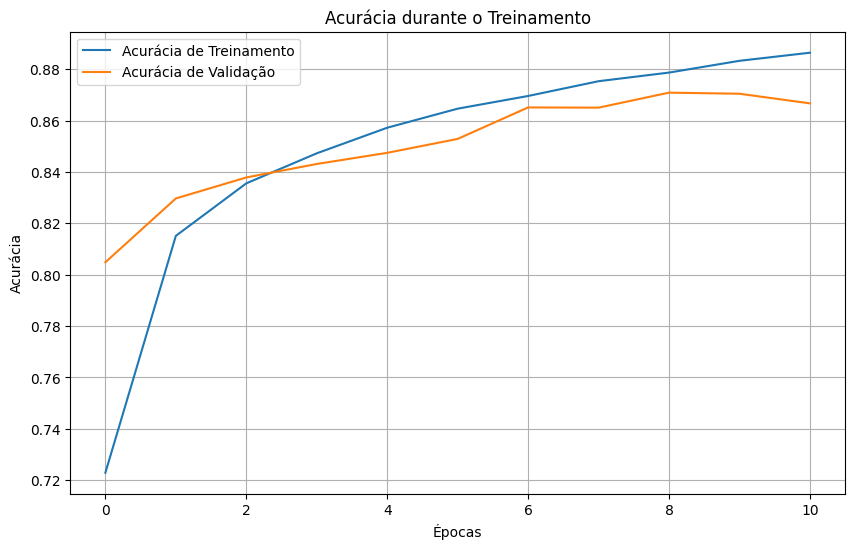

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(history2.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history2.history['val_accuracy'], label='Acurácia de Validação')

plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

## Métricas

In [24]:
labels2 = np.argmax(y_test, axis=1)

In [25]:
predict2 = model2.predict(X_test)
preds2 = np.argmax(predict2, axis=1)

report2 = classification_report(labels2, preds2)
print(report2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       1.00      0.95      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.73      0.84      0.78      1000
           5       0.94      0.96      0.95      1000
           6       0.66      0.53      0.59      1000
           7       0.95      0.90      0.92      1000
           8       0.97      0.96      0.96      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



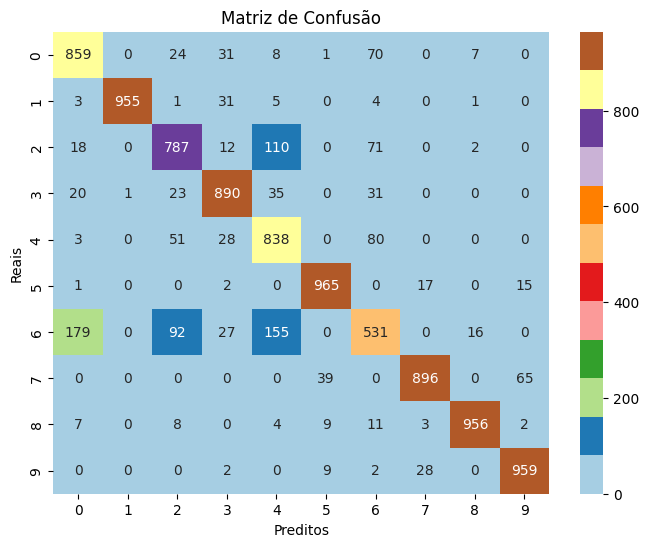

In [26]:
cm2 = confusion_matrix(labels2, preds2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Paired')
plt.title('Matriz de Confusão')
plt.xlabel('Preditos')
plt.ylabel('Reais')
plt.show()